# Visualizing continuous Hopfield network

Part of Bachelor's Thesis in mathematics: _Hopfieldin verkoista ja niiden tasapainopisteistä_

Author: Tommi Penttinen

Use freely, all code is provided as-is.

In [63]:
import collections
import itertools

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Suppress scientic output
np.set_printoptions(suppress=True)

def get_hebbian_matrix(memories):
    """
    Return a Hebbian learning matrix with the outer product method
    
    `memories`: a two-dimensional numpy matrix with memories as rows
    Returned matrix W 
    
    See for example section 7.4.1 in Silva et. al 2017: "Artificial Neural Networks: A Practical Course"
    """
    p, n = memories.shape
    weight_matrix = -p/ n * np.eye(n)
    weight_matrix += (1./n) * sum(m[:,np.newaxis] @ m[np.newaxis,:] for m in memories)
    
    return weight_matrix

In [31]:
SLOPE = 5.0

MEMORIES = np.array([
    [1, -1, 1, 1],
    [-1, 1, 1, -1],
])
W = get_hebbian_matrix(memories)

ETA = 1

BIAS = np.array([0, 0, 0, 0])

def phi(t, slope=SLOPE):
    return np.tanh(SLOPE * t)

def hopfield(x, t, weight_matrix, eta, bias):
    "Compute the derivative for a continuous Hopfield Network"
    x = np.array(x)
    dX = -eta * x + weight_matrix @ phi(x) + bias
    return dX


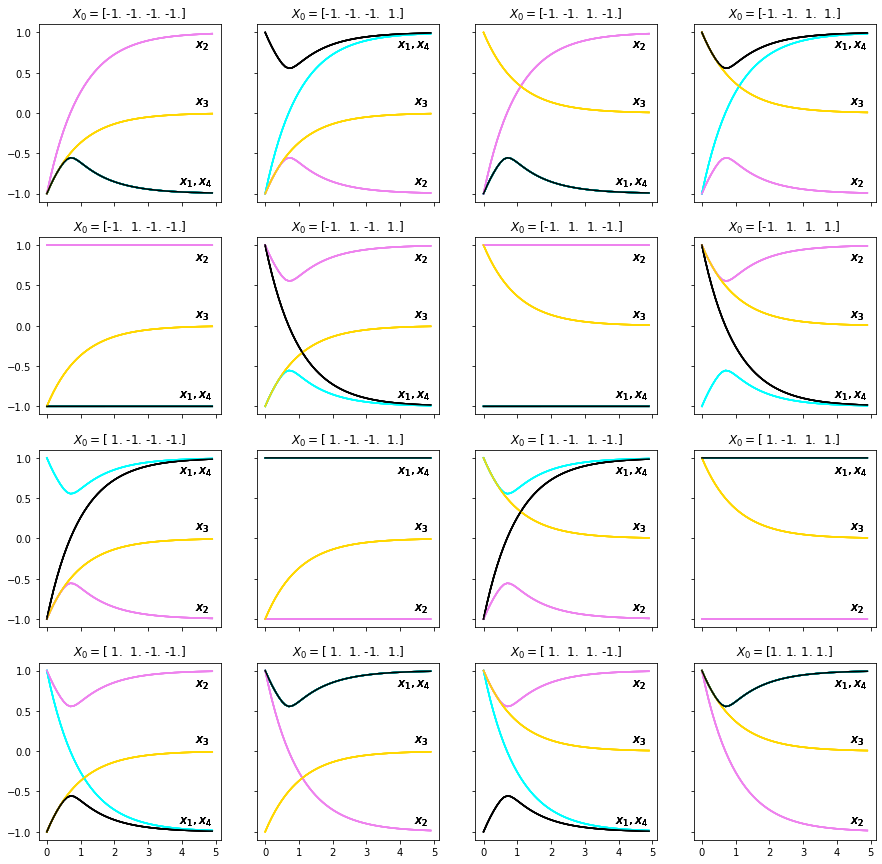

In [80]:
t = np.arange(0.0, 5.0, 0.1)

params = (W, ETA, BIAS)

colors = [
    '#00FFFF',  # aqua
    '#EE82EE', # violet 
    '#FFD700', # gold
    '#000000',  # black
]

def plot_complete_hopfield(t, params, initial_values_per_dimension=None, figsize=None):
    "Plot the behaviour of a Hopfield network given by `params` with all initial values"
    if initial_values_per_dimension is None:
        initial_values_per_dimension = [-1., 1.]
    if figsize is None:
        figsize = (15, 15)

    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=figsize, sharey=True, sharex=True)

    text_x = t[-1]
    text_anchors = [
        (text_x, 0.8),
        (text_x, 0.1),
        (text_x, -0.9),
    ]
    for __ in range(5):
        results = set()
        for X0 in itertools.product([-1.0, 1.], repeat=4):
            X0 = np.array(X0)
            result = odeint(hopfield, X0, t, params)
            
            # Determine the appropriate subplot
            x1, x2, x3, x4 = np.round((X0 + 1) / 2.0).astype(int)
            ax_x = 2 * x1 + x2
            ax_y = 2 * x3 + x4
            ax = axes[ax_x][ax_y]
            ax.set_title(f'$X_0=${X0}')

            texts = collections.defaultdict(list)
            for idx, neuron in enumerate(result.T):
                ax.plot(t, neuron, color=colors[idx])

                closest_text_anchor = min(text_anchors, key=lambda e: abs(e[1] - neuron[-1]))
                label = 'x_%d' % (idx + 1)
                texts[closest_text_anchor].append(label)
            
            # Add the labels for traces
            for (x, y), neuron_labels in texts.items():
                x = x - len(neuron_labels) * 0.5
                text = '$' + ",".join(neuron_labels) + '$'
                ax.text(x, y, text, size='large')

plot_complete_hopfield(t, params)

# plt.savefig('/tmp/continuous_hopfield.eps', format='eps')